## 1. Introduction
<p>LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes, colors and themes.</p>
<p>"Lego" was derived from the Danish phrase leg godt, which means "play well"</p>
<p><img src="https://sh-s7-live-s.legocdn.com/is/image/LEGO/6177?$PDPDefault$" alt="lego"></p>

## 2. Database Architecture
<p>The Data is taken from <a href='https://rebrickable.com/downloads/'>rebrickable</a> official LEGO website. This database contains information on which parts are included in different LEGO sets. These files are as of July 2018.</p>

<h3>The data is available as csv files and the schema is shown below <small>( obtained from their website )</small></h3>
<p><img src="https://rebrickable.com/static/img/diagrams/downloads_schema.png" alt="schema"></p>
<p>Let us start by reading in the datasets of lego sets!</p>

In [1]:
# Import all modules here

import pandas as pd # for data processing, read CSV file I/O (e.g. pd.read_csv)
import numpy as np # for scientific computing with Python
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
import os # to list all the datasets of lego project

In [2]:
path = 'datasets'
os.listdir(path)

['colors.csv',
 'inventories.csv',
 'inventory_parts.csv',
 'inventory_sets.csv',
 'parts.csv',
 'part_categories.csv',
 'sets.csv',
 'themes.csv']

<p>so we can see 8 Datasets here as shown in the database architecture above. Lets explore each dataset to get insights of datatypes and shapes of the data</p>

In [3]:
# Read the Data into DataFrames using Pandas library read_csv function

colors = pd.read_csv('datasets/colors.csv')
inventories = pd.read_csv('datasets/inventories.csv')
inventory_parts = pd.read_csv('datasets/inventory_parts.csv')
inventory_sets = pd.read_csv('datasets/inventory_sets.csv')
parts = pd.read_csv('datasets/parts.csv')
part_categories = pd.read_csv('datasets/part_categories.csv')
sets = pd.read_csv('datasets/sets.csv')
themes = pd.read_csv('datasets/themes.csv')

## 3. Data Description

In [4]:
# Print Head of all the datasets to get a peek through

print('colors\n' + str(colors.head()) + '\nShape' + str(colors.shape) + '\n')
print('inventories\n' + str(inventories.head()) + '\nShape' + str(inventories.shape) + '\n')
print('inventory_parts\n' + str(inventory_parts.head()) + '\nShape' + str(inventory_parts.shape) + '\n')
print('inventory_sets\n' + str(inventory_sets.head()) + '\nShape' + str(inventory_sets.shape) + '\n')
print('parts\n' + str(parts.head()) + '\nShape' + str(parts.shape) + '\n')
print('part_categories\n' + str(part_categories.head()) + '\nShape' + str(part_categories.shape) + '\n')
print('sets\n' + str(sets.head()) + '\nShape' + str(sets.shape) + '\n')
print('themes\n' + str(themes.head()) + '\nShape' + str(themes.shape) + '\n')

colors
   id            name     rgb is_trans
0  -1         Unknown  0033B2        f
1   0           Black  05131D        f
2   1            Blue  0055BF        f
3   2           Green  237841        f
4   3  Dark Turquoise  008F9B        f
Shape(139, 4)

inventories
   id  version set_num
0   1        1  7922-1
1   3        1  3931-1
2   4        1  6942-1
3  15        1  5158-1
4  16        1   903-1
Shape(13008, 3)

inventory_parts
   inventory_id     part_num  color_id  quantity is_spare
0             1     48379c01        72         1        f
1             1        48395         7         1        f
2             1     mcsport6        25         1        f
3             1       paddle         0         1        f
4             3  11816pr0005        78         1        f
Shape(673467, 5)

inventory_sets
   inventory_id  set_num  quantity
0            35  75911-1         1
1            35  75912-1         1
2            39  75048-1         1
3            39  75053-1         1
4    

<h3> 3.1 Info on each Dataset </h3>

In [5]:
print('Info of sets:')
sets.info()
sets.describe()

Info of sets:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12875 entries, 0 to 12874
Data columns (total 5 columns):
set_num      12875 non-null object
name         12875 non-null object
year         12875 non-null int64
theme_id     12875 non-null int64
num_parts    12875 non-null int64
dtypes: int64(3), object(2)
memory usage: 503.0+ KB


,year,theme_id,num_parts
count,12875.000000,12875.000000,12875.000000
mean,2002.734524,334.445748,165.516816
std,13.838464,189.845661,348.224585
min,1949.000000,1.000000,-1.000000
25%,1997.000000,168.000000,11.000000
50%,2006.000000,371.000000,46.000000
75%,2013.000000,494.000000,172.000000
max,2018.000000,653.000000,7541.000000


In [6]:
print('Info of inventory_parts:')
inventory_parts.info()
inventory_parts.describe()

Info of inventory_parts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673467 entries, 0 to 673466
Data columns (total 5 columns):
inventory_id    673467 non-null int64
part_num        673467 non-null object
color_id        673467 non-null int64
quantity        673467 non-null int64
is_spare        673467 non-null object
dtypes: int64(3), object(2)
memory usage: 25.7+ MB


,inventory_id,color_id,quantity
count,673467.000000,673467.000000,673467.000000
mean,10443.598028,81.791531,3.288820
std,6595.315863,627.530558,8.214414
min,1.000000,-1.000000,1.000000
25%,5018.000000,2.000000,1.000000
50%,9952.000000,15.000000,2.000000
75%,14756.000000,71.000000,4.000000
max,26486.000000,9999.000000,1440.000000


In [7]:
print('Info of part_categories:')
part_categories.info()
part_categories.describe()

Info of part_categories:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 2 columns):
id      58 non-null int64
name    58 non-null object
dtypes: int64(1), object(1)
memory usage: 1008.0+ bytes


,id
count,58.000000
mean,29.500000
std,16.886879
min,1.000000
25%,15.250000
50%,29.500000
75%,43.750000
max,58.000000


In [8]:
print('Info of parts:')
parts.info()
parts.describe()

Info of parts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29718 entries, 0 to 29717
Data columns (total 3 columns):
part_num       29718 non-null object
name           29718 non-null object
part_cat_id    29718 non-null int64
dtypes: int64(1), object(2)
memory usage: 696.6+ KB


,part_cat_id
count,29718.000000
mean,20.923952
std,14.887312
min,1.000000
25%,13.000000
50%,13.000000
75%,28.000000
max,58.000000


In [9]:
print('Info of themes:')
themes.info()
themes.describe()

Info of themes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 3 columns):
id           652 non-null int64
name         652 non-null object
parent_id    537 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 15.4+ KB


,id,parent_id
count,652.000000,537.000000
mean,326.546012,290.232775
std,188.436658,182.467836
min,1.000000,1.000000
25%,163.750000,126.000000
50%,326.500000,290.000000
75%,489.250000,465.000000
max,653.000000,632.000000


In [10]:
print('Info of colors:')
colors.info()
colors.describe()

Info of colors:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 4 columns):
id          139 non-null int64
name        139 non-null object
rgb         139 non-null object
is_trans    139 non-null object
dtypes: int64(1), object(3)
memory usage: 4.4+ KB


,id
count,139.000000
mean,274.805755
std,874.872420
min,-1.000000
25%,35.500000
50%,89.000000
75%,280.000000
max,9999.000000


In [11]:
print('Info of inventories:')
inventories.info()
inventories.describe()

Info of inventories:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13008 entries, 0 to 13007
Data columns (total 3 columns):
id         13008 non-null int64
version    13008 non-null int64
set_num    13008 non-null object
dtypes: int64(2), object(1)
memory usage: 305.0+ KB


,id,version
count,13008.000000,13008.000000
mean,10091.705105,1.012223
std,6612.056918,0.132123
min,1.000000,1.000000
25%,4725.250000,1.000000
50%,9492.500000,1.000000
75%,14194.250000,1.000000
max,26486.000000,5.000000


In [12]:
print('Info of inventory_sets:')
inventory_sets.info()
inventory_sets.describe()

Info of inventory_sets:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3039 entries, 0 to 3038
Data columns (total 3 columns):
inventory_id    3039 non-null int64
set_num         3039 non-null object
quantity        3039 non-null int64
dtypes: int64(2), object(1)
memory usage: 71.3+ KB


,inventory_id,quantity
count,3039.000000,3039.000000
mean,9530.866074,1.393880
std,6498.050358,4.666336
min,35.000000,1.000000
25%,4261.000000,1.000000
50%,8820.000000,1.000000
75%,13538.000000,1.000000
max,26437.000000,60.000000


<p>As we can see the Description, each Dataset is free of any missing values. There are no null entries in any of the datasets. So, let's move on to next step. Exploratory Analysis</p>

## Data Preparation
<h3>Checking for missing values</h3>

In [13]:
# colors dataset missing values
total = colors.isnull().sum().sort_values(ascending=False) # total missing values
percent = (colors.isnull().sum()/colors.isnull().count()).sort_values(ascending=False) # total percent of missing values
missing_colors = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_colors

,Total,Percent
is_trans,0,0.0
rgb,0,0.0
name,0,0.0
id,0,0.0


<p>No missing values for colors</p>

In [14]:
# themes
total = themes.isnull().sum().sort_values(ascending=False) # total missing values
percent = (themes.isnull().sum()/themes.isnull().count()).sort_values(ascending=False) # total percent of missing values
missing_themes = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_themes

,Total,Percent
parent_id,115,0.17638
name,0,0.00000
id,0,0.00000


<p>Only missing values are parent_id which is not a mandatory field for themes.</p>

In [15]:
# inventories
total = inventories.isnull().sum().sort_values(ascending=False) # total missing values
percent = (inventories.isnull().sum()/inventories.isnull().count()).sort_values(ascending=False) # total percent of missing values
missing_inventories = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_inventories

,Total,Percent
set_num,0,0.0
version,0,0.0
id,0,0.0


In [16]:
# inventory_parts
total = inventory_parts.isnull().sum().sort_values(ascending=False) # total missing values
percent = (inventory_parts.isnull().sum()/inventory_parts.isnull().count()).sort_values(ascending=False) # total percent of missing values
missing_inventory_parts = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_inventory_parts

,Total,Percent
is_spare,0,0.0
quantity,0,0.0
color_id,0,0.0
part_num,0,0.0
inventory_id,0,0.0


In [17]:
# inventory_sets
total = inventory_sets.isnull().sum().sort_values(ascending=False) # total missing values
percent = (inventory_sets.isnull().sum()/inventory_sets.isnull().count()).sort_values(ascending=False) # total percent of missing values
missing_inventory_sets = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_inventory_sets

,Total,Percent
quantity,0,0.0
set_num,0,0.0
inventory_id,0,0.0


In [18]:
# parts
total = parts.isnull().sum().sort_values(ascending=False) # total missing values
percent = (parts.isnull().sum()/parts.isnull().count()).sort_values(ascending=False) # total percent of missing values
missing_parts = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_parts

,Total,Percent
part_cat_id,0,0.0
name,0,0.0
part_num,0,0.0


In [19]:
# part_categories
total = part_categories.isnull().sum().sort_values(ascending=False) # total missing values
percent = (part_categories.isnull().sum()/part_categories.isnull().count()).sort_values(ascending=False) # total percent of missing values
missing_part_categories = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_part_categories

,Total,Percent
name,0,0.0
id,0,0.0


In [20]:
# sets
total = sets.isnull().sum().sort_values(ascending=False) # total missing values
percent = (sets.isnull().sum()/sets.isnull().count()).sort_values(ascending=False) # total percent of missing values
missing_sets = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_sets

,Total,Percent
num_parts,0,0.0
theme_id,0,0.0
year,0,0.0
name,0,0.0
set_num,0,0.0


<p>There are no missing values in any datasets. we can move on to data exploration</p>

## Data Exploration

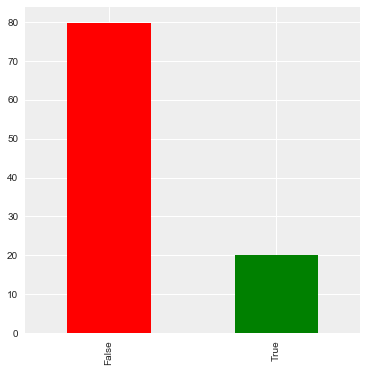

In [30]:
colors_trans = colors['is_trans'].map({'f':False, 't': True})

# tansparency of lego blocks normalised
(colors_trans.value_counts(normalize=True)*100).plot(kind='bar', figsize=(6,6), color=['red', 'green'])

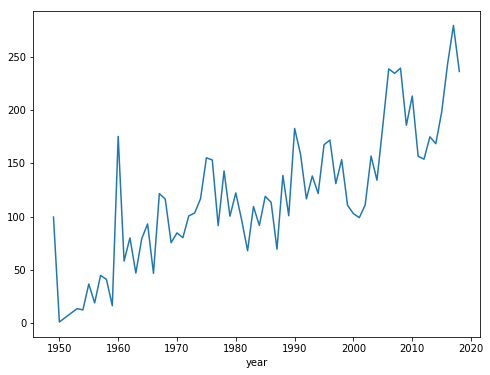

In [22]:
# sets
# average number of parts included in the set by year
parts_by_year = sets.groupby('year')['num_parts'].mean().round(2)

# Plot of trends in average number of parts by year
parts_by_year.plot(x='year', y='num_parts', figsize=(8, 6))

<p>The number of parts included in the set, i.e the size on an average has increased over the years leading to bigger lego builds in recent times</p>

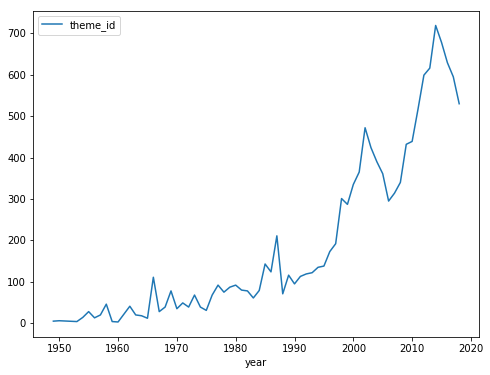

In [23]:
# average number of themes released per year
themes_by_year = sets[['year', 'theme_id']].groupby('year').count().reset_index()
themes_by_year.plot(x='year', figsize=(8,6))

<p>The number of themes released per year increased over the years. The growth has been linear for 50 years and has been a steeper increase in last 2 decades</p>

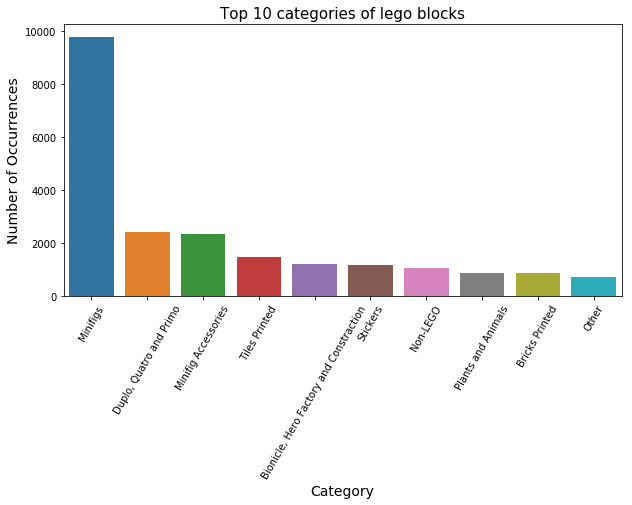

In [24]:
parts_cat_freq = parts['part_cat_id'].value_counts().sort_index() # frequency of part category id's

# converted parts_cat_freq to a DataFrame with index same as of part_categories to merge on common id column
parts_cat_freq = pd.DataFrame({'id': parts_cat_freq.index, 'parts_cat_freq': parts_cat_freq.values})

# merged 2 dataframes, one with "parts category id and its frquency", other with "parts category id and it's name" on common id column 
parts_cat_name_freq = parts_cat_freq.merge(part_categories, on='id')

parts_cat_name_freq_sorted = parts_cat_name_freq[['name', 'parts_cat_freq']].sort_values(by='parts_cat_freq', ascending=False)

# top 10 categories of lego blocks
parts_cat_name_freq_sorted_top = parts_cat_name_freq_sorted[:10]

# Adjusting the matplotlib plot parameters like labels and figsize
plt.figure(figsize=(10,5))
sns.barplot(parts_cat_name_freq_sorted_top.name, parts_cat_name_freq_sorted_top.parts_cat_freq)
plt.title('Top 10 categories of lego blocks', fontsize=15)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.xlabel('Category', fontsize=14)
plt.xticks(rotation=60)
plt.show()

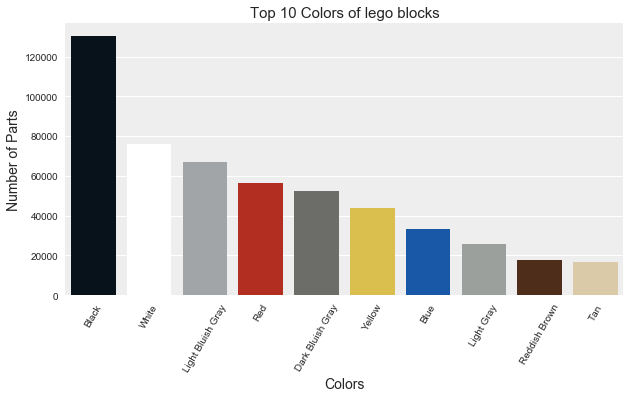

In [25]:
# most frequently used colors and their respective colors in plot
# inventory_parts['color_id'].head(18)

inv_parts_color_freq = inventory_parts['color_id'].value_counts().sort_index() # frequency of part category id's

# converted parts_cat_freq to a DataFrame with index same as of part_categories to merge on common id column
inv_parts_color_freq = pd.DataFrame({'id': inv_parts_color_freq.index, 'inv_parts_color_freq': inv_parts_color_freq.values})

# merged 2 dataframes, one with "parts category id and its frquency", other with "parts category id and it's name" on common id column 
inv_parts_color_freq = inv_parts_color_freq.merge(colors, on='id')

# inv_parts_color_freq_palette = 

inv_parts_color_freq_sorted = inv_parts_color_freq[['name', 'inv_parts_color_freq', 'rgb']].sort_values(by='inv_parts_color_freq', ascending=False)

# top 10 categories of lego blocks
inv_parts_color_freq_sorted = inv_parts_color_freq_sorted[:10]

# inventory parts color palette using their corresponding RGB values
inv_parts_color_freq_sorted_palette = np.array ('#' + inv_parts_color_freq_sorted['rgb'] )

# Adjusting the matplotlib plot parameters like labels and figsize
plt.figure(figsize=(10,5))
sns.set(rc={'axes.facecolor':'#eeeeee', 'figure.facecolor':'#ffffff'})
sns.barplot( inv_parts_color_freq_sorted.name, inv_parts_color_freq_sorted.inv_parts_color_freq, palette=inv_parts_color_freq_sorted_palette)
plt.title('Top 10 Colors of lego blocks', fontsize=15)
plt.ylabel('Number of Parts', fontsize=14)
plt.xlabel('Colors', fontsize=14)
plt.xticks(rotation=60)
plt.show()

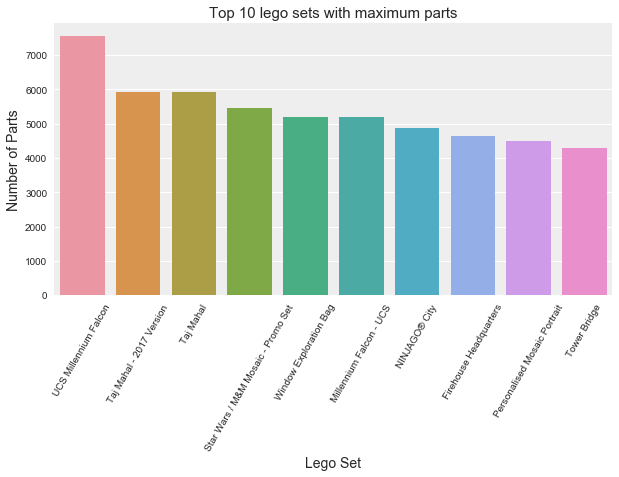

In [26]:
high_num_sets = sets[['name', 'num_parts']].sort_values(by='num_parts', ascending=False)[:10]

# high_num_sets
# Adjusting the matplotlib plot parameters like labels and figsize
plt.figure(figsize=(10,5))
sns.set(rc={'axes.facecolor':'#eeeeee', 'figure.facecolor':'#ffffff'})
sns.barplot( high_num_sets.name, high_num_sets.num_parts)
plt.title('Top 10 lego sets with maximum parts', fontsize=15)
plt.ylabel('Number of Parts', fontsize=14)
plt.xlabel('Lego Set', fontsize=14)
plt.xticks(rotation=60)
plt.show()

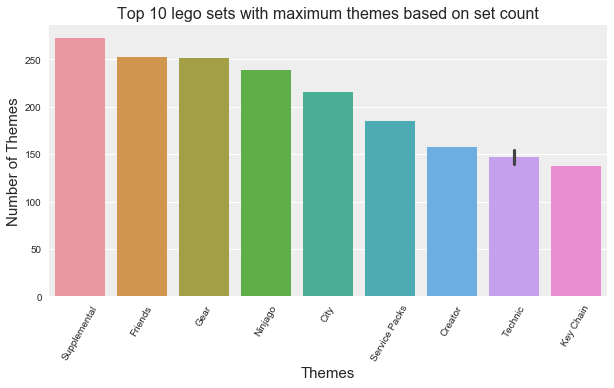

In [27]:
high_theme_sets = sets['theme_id'].value_counts()[:10]

# convert value counts themes to dataframes
high_theme_sets = pd.DataFrame({'id': high_theme_sets.index, 'theme_count': high_theme_sets.values})

# merge two dataframes on common id's
high_theme_sets_df = high_theme_sets.merge(themes)

plt.figure(figsize=(10,5))
sns.set(rc={'axes.facecolor':'#eeeeee', 'figure.facecolor':'#ffffff'})
sns.barplot( high_theme_sets_df.name, high_theme_sets_df.theme_count)
plt.title('Top 10 lego sets with maximum themes based on set count', fontsize=16)
plt.ylabel('Number of Themes', fontsize=15)
plt.xlabel('Themes', fontsize=15)
plt.xticks(rotation=60)
plt.show()

## Summary
<ul>
    <li>By looking at Info of all Tables, we can see that there is no missing data in any of the DataFrames</li>
    <li>Most of the lego set pieces ( around 80% ) are translucent</li>
    <li>The number of parts in a set on average increased over the years</li>
    <li>The number of themes released over the years has seen a steady increase till 2000 and exponentially since then</li>
    <li>Minifig category has got more parts compared to any other categories and it's frequency is quadrapule of second leading category</li>
    <li>Most used Colors for Lego Blocks are the commonly used colors like Black, White, Red, Yellow and Blue. Different Variations of these colors mixed with gray follow them in frequency.</li>
</ul>